In [16]:
import pandas as pd
import matplotlib.pyplot as plt

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, average_precision_score

In [2]:
# Import model data
filepath = 'filepath/Model_Data_HR-Employee-Attrition.csv'
model_att_df = pd.read_csv(filepath)

In [3]:
# Overview of the data
model_att_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 58 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EmployeeNumber                     1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  MonthlyRate                        1470 non-null   int64
 12  NumCompaniesWorked  

In [4]:
#Data Prepping for Modelling
# Separate features (X) and target variable (y)
X = model_att_df.drop(columns=['Attrition_encoded', 'EmployeeNumber'])
y = model_att_df['Attrition_encoded']

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(eval_metric='logloss', learning_rate=0.1, max_depth=3, n_estimators=100,
                              scale_pos_weight=3.1, random_state=42)

# Fit the model on the resampled, scaled training data
xgb_model.fit(X_train, y_train)

# Predict on the scaled test data
y_pred = xgb_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       380
           1       0.53      0.51      0.52        61

    accuracy                           0.87       441
   macro avg       0.73      0.72      0.72       441
weighted avg       0.87      0.87      0.87       441



In [74]:
# Predict for the full dataset
y_full_pred = xgb_model.predict(X)

# Create a new DataFrame with EmployeeNumber and predicted attrition
output_df = pd.DataFrame({
    'EmployeeNumber': model_att_df['EmployeeNumber'],
    'Actual_Attrition': model_att_df['Attrition_encoded'],
    'Predicted_Attrition': y_full_pred
})

In [84]:
export_filepath = 'C:/Users/Ricky/Desktop/Data Analyst Course/Attrition Project/Pred_Data_HR-Employee-Attrition.csv'
output_df.to_csv(export_filepath, index=False)

ROC-AUC Score: 0.7917
AUCPR: 0.5007
Average Precision Score: 0.5045


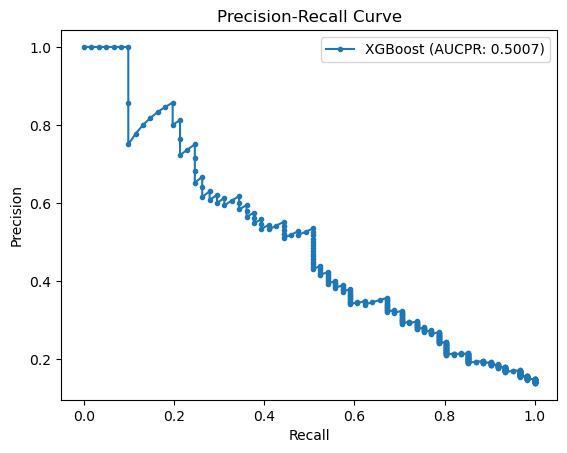

In [17]:
# Predict probabilities on the test data
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class (1)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the ROC-AUC score
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Predict the probabilities on the test data (needed for AUCPR)
y_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Calculate precision, recall, and thresholds for the PR curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)

# Calculate AUCPR (Area Under the Precision-Recall Curve)
aucpr = auc(recall, precision)

# You can also use average_precision_score as an alternative to auc(recall, precision)
avg_precision = average_precision_score(y_test, y_proba)

# Print AUCPR score
print(f"AUCPR: {aucpr:.4f}")
print(f"Average Precision Score: {avg_precision:.4f}")

# Optionally, plot the precision-recall curve
plt.plot(recall, precision, marker='.', label='XGBoost (AUCPR: {:.4f})'.format(aucpr))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()